In [107]:
# imports
import pandas as pd
import numpy as np
from dateutil import parser

In [108]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [109]:
# read csvs & build dataframe
df = pd.read_csv('./datasets/2_dados_correlacionados.csv', ',')
pd.set_option('display.max_rows', 50)

In [110]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

import mpld3
import matplotlib.style as style
import matplotlib.pyplot as plt
mpld3.enable_notebook()

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS', 'QTD_CONCORRENTES', 'NAO_FERIADO', 'FERIADO', 'DATA_FESTIVA', 'SEMANA_DE_NAO_PAGAMENTO', 'SEMANA_PAGAMENTO'])
y = df.drop(columns=['DATA', 'FDS', 'DS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'DATA_NAO_FESTIVA', 'FERIADO', 'NAO_FERIADO', 'SEMANA_PAGAMENTO', 'SEMANA_DE_NAO_PAGAMENTO', 'BAIXA_TEMPORADA', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

# feature scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

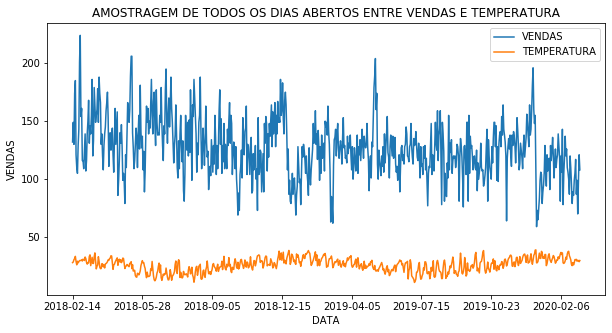

In [111]:
df.plot(y=['VENDAS', 'TEMPERATURA'], x='DATA', figsize=(10, 5))
plt.legend(loc=1)
plt.title('AMOSTRAGEM DE TODOS OS DIAS ABERTOS ENTRE VENDAS E TEMPERATURA')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()

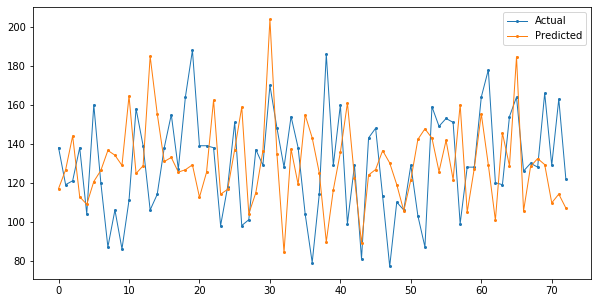

RMSE: 1118.404943294584


In [112]:
# modeling
model = GradientBoostingRegressor(random_state=0, n_estimators=6000, max_depth=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# printing first metrics
print(f'RMSE: {metrics.mean_squared_error(y_test, y_pred, squared=True)}')

In [ ]:
# random saearch
parameters = {
    'loss': ['ls', 'lad', 'quantile'],
    'criterion': ['mse', 'mae', 'friedman_mse'],
    'max_depth': [5, 10, 30, 60, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate': [0.1, 0.5, 1, 1.5, 2]
}            
search_obj = GridSearchCV(model, parameters, n_jobs=-1)
fit_obj = search_obj.fit(X_train, y_train)
fit_obj.best_estimator_

In [ ]:
# modeling
b_model = fit_obj.best_estimator_
b_model.fit(X_train, y_train)
b_y_pred = b_model.predict(X_test)
b_y_pred
df2 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': b_y_pred.flatten()})
df2.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# printing first metrics
print(f'RMSE: {metrics.mean_squared_error(y_test, b_y_pred, squared=True)}')